In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import sounddevice as sd
from scipy import signal as sgn
import IPython.display as ipd

### Algoritmo Griffin Lim 

In [15]:
def griffin_lim(y, fs, iteracion, ventana = 'hann'):
    '''
    Returns the value for the complex matrix for a signal in time,
    from the magnitude of a espectrogram for the STFT. 

    Parameters
    ----------
    y : ndarray
        Magnitude of the espectogram of STFT.
    fs : int 
        sample rate.
    iteracion : int
        Quatity of iterations.
    ventana : text, optional
        Type of window. The default is 'hann'.

    Returns
    -------
    t : ndarray
        Time's vector.
    ISTFT_initial : ndarray complex
        Inverse STFT.

    '''
    
    y_real = np.real(y)
    matriz_compleja = np.random.randn(*y_real.shape)
    matriz_reconstruida = y_real* np.exp(1j*matriz_compleja)
    b, ISTFT_inicial = sgn.istft(matriz_reconstruida, fs, window = ventana, nperseg = 1000)
    
    counter= 0
    
    while counter<iteracion:
    
        f2,t2,inicio = sgn.stft(ISTFT_inicial,fs, window = ventana , nperseg = 1000)
        inicio_compleja = np.imag(inicio)
        E = y_real * np.exp(1j*inicio_compleja)
        t,ISTFT_initial = sgn.istft(E,fs,window = ventana , nperseg = 1000)
        counter += 1
    
    return t,ISTFT_initial

## Audios importados

In [16]:
voice, fs1 = lb.load('voice.wav') 
bosque, fs2 = lb.load('bosque.wav')
guitarra, fs3 = lb.load('guitarra.wav')

t_voice = np.linspace(0, len(voice)/fs1, len(voice))
t_bosque = np.linspace(0, len(bosque)/fs2, len(bosque))
t_guitarra = np.linspace(0, len(guitarra)/fs3, len(guitarra))

## Creacion senial de 5 tono 

In [17]:
fs = 44100
n = np.linspace(0,10,fs)
tonos = np.sin(2*np.pi*100*n) + np.sin(2*np.pi*260*n) + np.sin(2*np.pi*588*n) + np.sin(2*np.pi*878*n) +np.sin(2*np.pi*1206*n)
t_tonos = np.linspace(0, len(tonos)/fs, len(tonos))

### Espectrogramas


In [18]:
f1, t1, y_voice = sgn.stft(voice, fs1, window = 'hann', nperseg = 1000)
f2, t2, y_bosque = sgn.stft(bosque, fs2, window = 'hann', nperseg = 1000)
f3, t3, y_guitarra = sgn.stft(guitarra, fs3, window = 'hann', nperseg = 1000)
f4, t4, y_tonos = sgn.stft(tonos, fs, window = 'hann', nperseg = 1000)


## Implementacion de algoritmo propio

In [19]:
t1_lim, voice_aprox = griffin_lim(y_voice, fs1,10)
t2_lim, bosque_aprox = griffin_lim(y_bosque,fs2,10)
t3_lim, guitarra_aprox = griffin_lim(y_guitarra,fs3,10)
t4_lim, tonos_aprox = griffin_lim(y_tonos,fs,10)

### Librosa

In [20]:
voice_librosa = lb.griffinlim(y_voice, 10, int(1000/2), 1000, 'hann')
bosque_librosa = lb.griffinlim(y_bosque, 10, int(1000/2), 1000, 'hann')
guitarra_librosa = lb.griffinlim(y_guitarra, 10, int(1000/2), 1000, 'hann')
tonos_librosa = lb.griffinlim(y_tonos, 10, int(1000/2), 1000, 'hann')

t1_lib = np.linspace(0, len(voice_librosa)/fs1, len(voice_librosa))
t2_lib = np.linspace(0, len(bosque_librosa)/fs2, len(bosque_librosa))
t3_lib = np.linspace(0, len(guitarra_librosa)/fs3, len(guitarra_librosa))
t4_lib = np.linspace(0, len(tonos_librosa)/fs, len(tonos_librosa))

### Plots

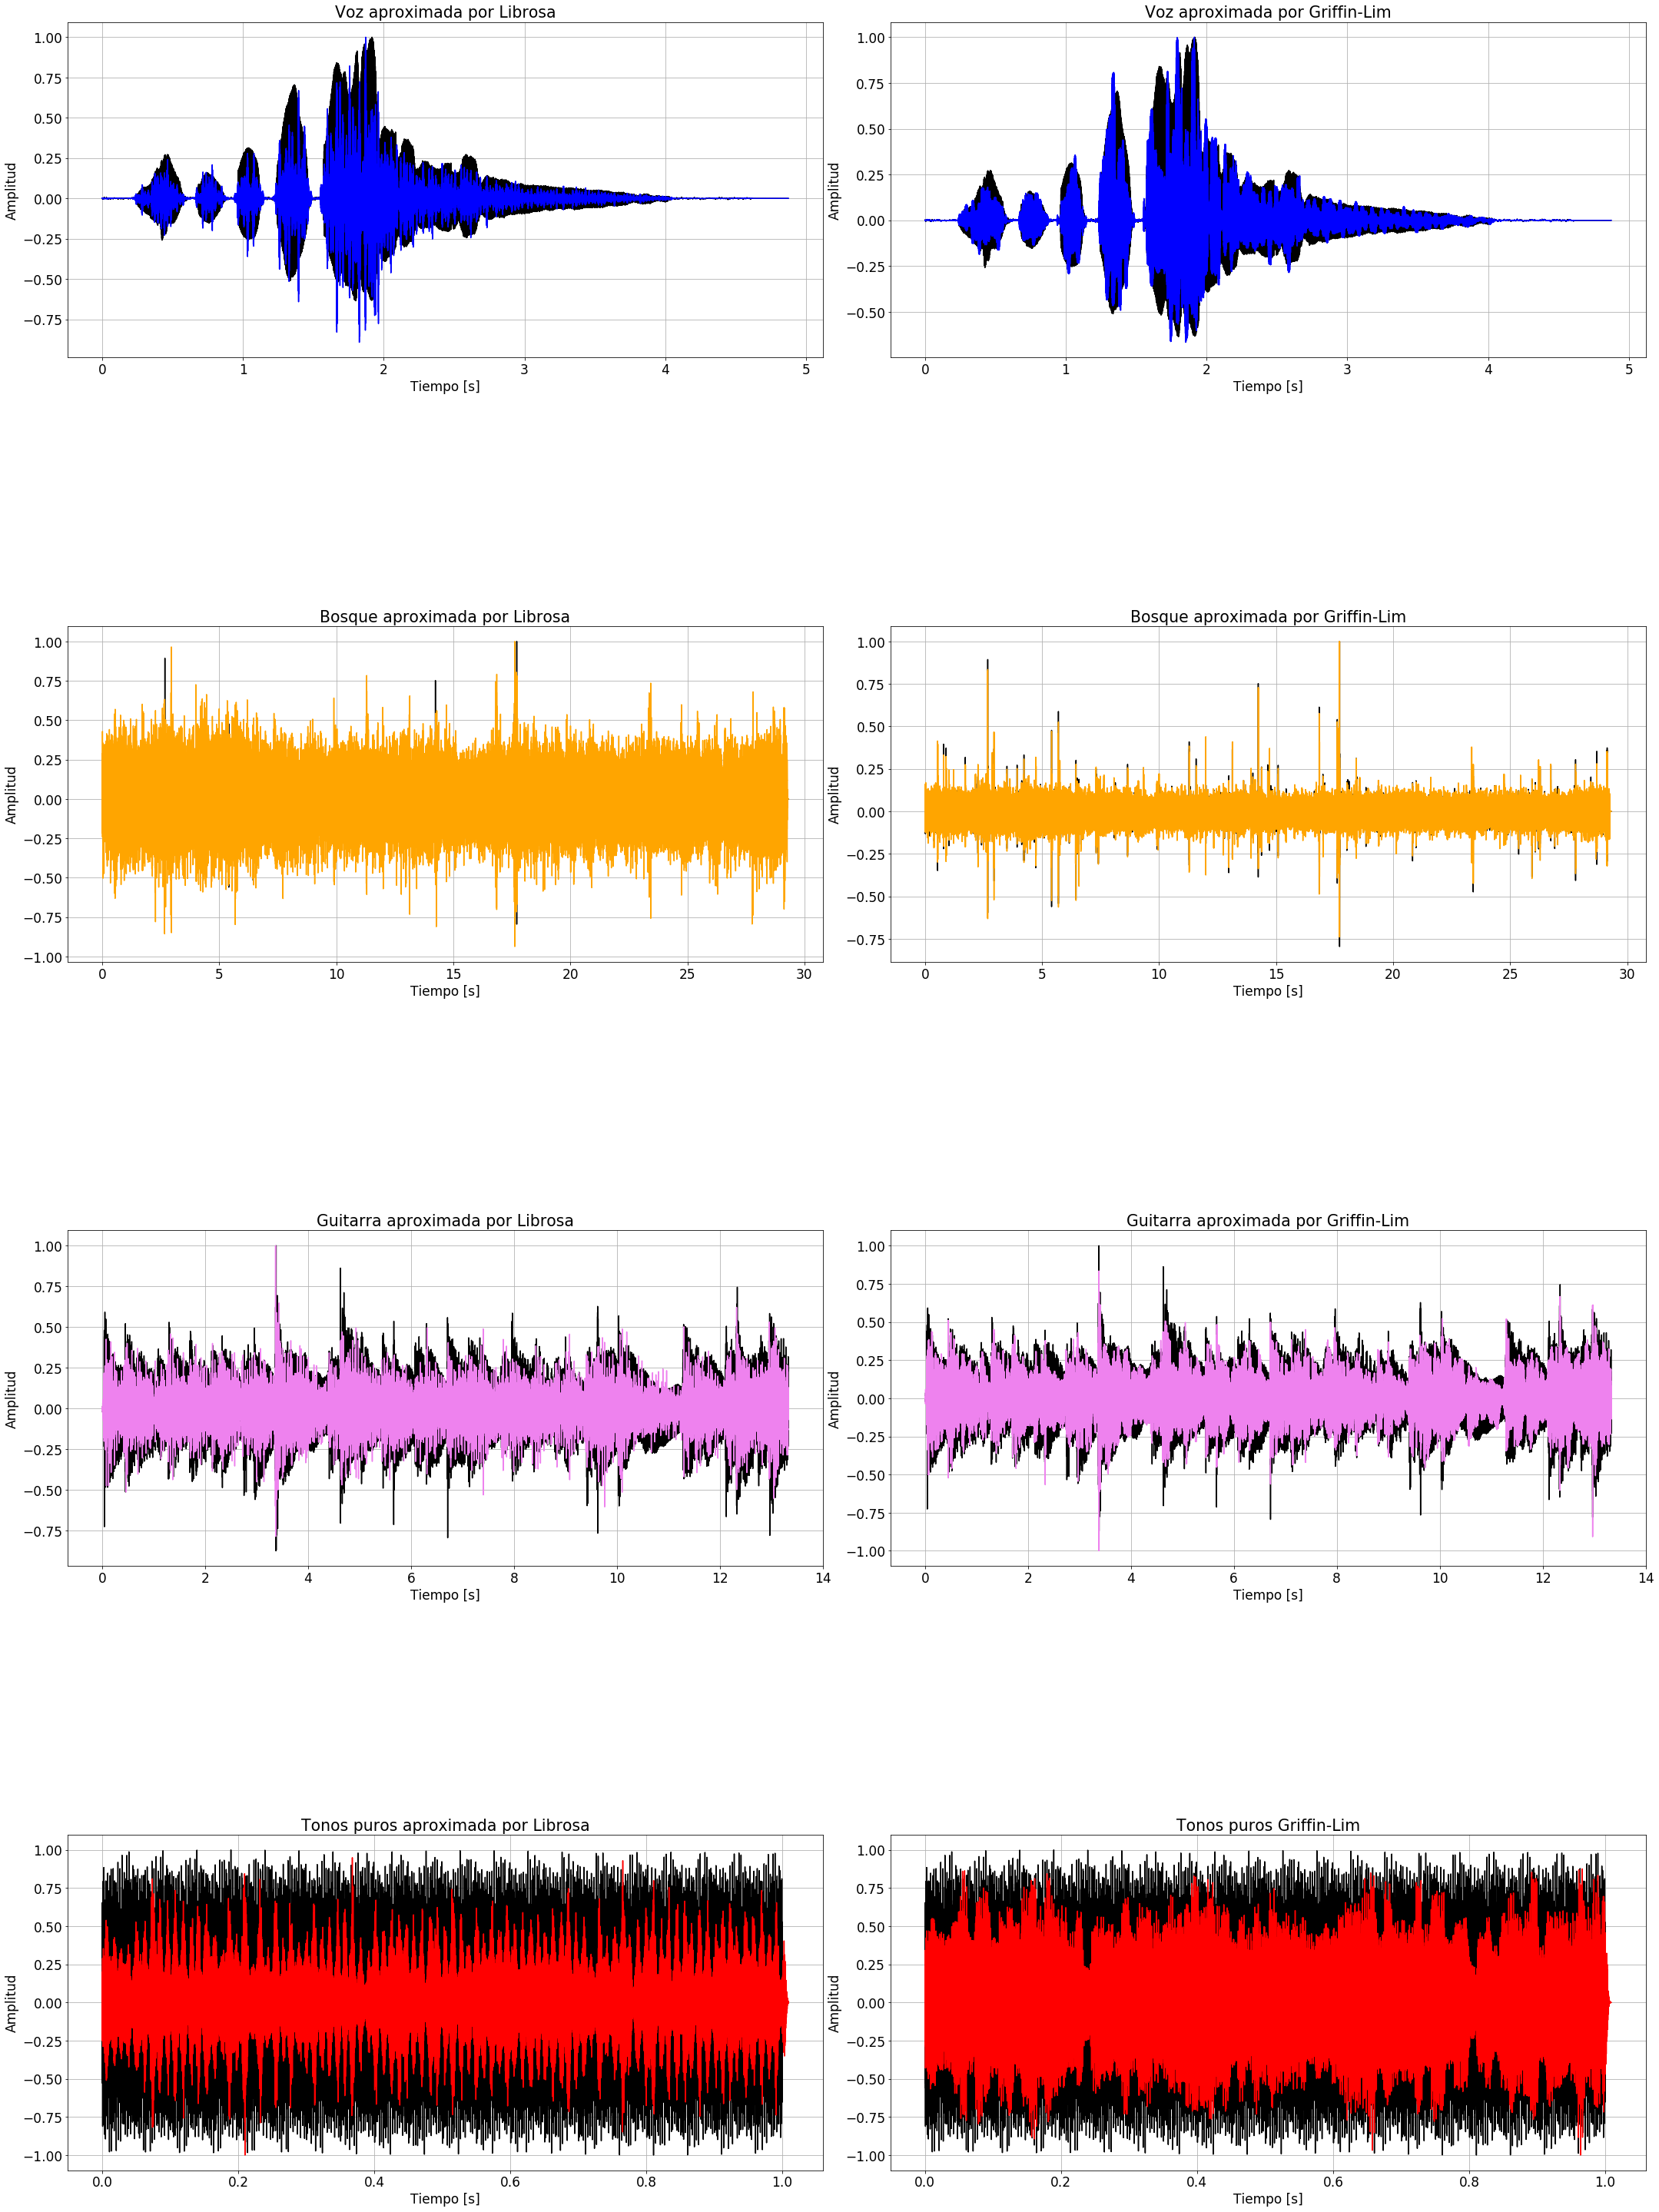

In [21]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(4, 2, sharex=False, sharey=False, figsize=[30, 40])
axs[0, 0].plot(t_voice, voice/max(abs(voice)), color ='black')
axs[0, 0].plot(t1_lib, voice_librosa/max(abs(voice_librosa)), color ='blue')
axs[0, 0].set_title('Voz aproximada por Librosa')
axs[1, 0].plot(t_bosque, bosque/max(abs(bosque)), color ='black')
axs[1, 0].plot(t2_lib, bosque_librosa/max(abs(bosque_librosa)), color ='orange')
axs[1, 0].set_title('Bosque aproximada por Librosa')
axs[2, 0].plot(t_guitarra, guitarra/max(abs(guitarra)),color ='black')
axs[2, 0].plot(t3_lib, guitarra_librosa/max(abs(guitarra_librosa)),color ='violet')
axs[2, 0].set_title('Guitarra aproximada por Librosa')
axs[3, 0].plot(t_tonos, tonos/max(abs(tonos)), color ='black')
axs[3, 0].plot(t4_lib, tonos_librosa/max(abs(tonos_librosa)), color ='red')
axs[3, 0].set_title('Tonos puros aproximada por Librosa')
               
axs[0, 1].plot(t_voice, voice/max(abs(voice)), color ='black') 
axs[0, 1].plot(t1_lim, voice_aprox/max(abs(voice_aprox)), color = 'blue')
axs[0, 1].set_title('Voz aproximada por Griffin-Lim')
axs[1, 1].plot(t_bosque, bosque/max(abs(bosque)), color ='black')
axs[1, 1].plot(t2_lim, bosque_aprox/max(abs(bosque_aprox)), color='orange')
axs[1, 1].set_title('Bosque aproximada por Griffin-Lim')
axs[2, 1].plot(t_guitarra, guitarra/max(abs(guitarra)),color ='black')
axs[2, 1].plot(t3_lim, guitarra_aprox/max(abs(guitarra_aprox)),color='violet')
axs[2, 1].set_title('Guitarra aproximada por Griffin-Lim')
axs[3, 1].plot(t_tonos, tonos/max(abs(tonos)), color ='black')
axs[3, 1].plot(t4_lim, tonos_aprox/max(abs(tonos_aprox)), color='red')
axs[3, 1].set_title('Tonos puros Griffin-Lim')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[4].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[5].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[6].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[7].set(ylabel='Amplitud', xlabel='Tiempo [s]')

plt.subplots_adjust( 
                    hspace=0.8)
for ax in axs.flat:
    ax.grid()

**En negro se plotea los valores de la señal original, mientras que los colores representan los valores de que devuelven los diferentes algoritmos.

### fft

In [22]:
####modulos normalizados 4

fft_voice = np.abs(np.fft.rfft(voice))/np.max(np.abs(np.fft.rfft(voice)))
fft_voice_aprox = np.abs(np.fft.rfft(voice_aprox))/np.max(np.abs(np.fft.rfft(voice_aprox)))
fft_voice_librosa= np.abs(np.fft.rfft(voice_librosa))/np.max(np.abs(np.fft.rfft(voice_librosa)))

fft_bosque = np.abs(np.fft.rfft(bosque))/np.max(np.abs(np.fft.rfft(bosque)))
fft_bosque_aprox = np.abs(np.fft.rfft(bosque_aprox))/np.max(np.abs(np.fft.rfft(bosque_aprox)))
fft_bosque_librosa = np.abs(np.fft.rfft(bosque_librosa))/np.max(np.abs(np.fft.rfft(bosque_librosa)))

fft_guitarra = np.abs(np.fft.rfft(guitarra))/np.max(np.abs(np.fft.rfft(guitarra)))
fft_guitarra_aprox = np.abs(np.fft.rfft(guitarra_aprox))/ np.max(np.abs(np.fft.rfft(guitarra_aprox)))
fft_guitarra_librosa = np.abs(np.fft.rfft(guitarra_librosa))/ np.max(np.abs(np.fft.rfft(guitarra_librosa)))

fft_tonos = np.abs(np.fft.rfft(tonos))/np.max(np.abs(np.fft.rfft(tonos)))
fft_tonos_aprox = np.abs(np.fft.rfft(tonos_aprox))/np.max(np.abs(np.fft.rfft(tonos_aprox)))
fft_tonos_librosa = np.abs(np.fft.rfft(tonos_librosa))/np.max(np.abs(np.fft.rfft(tonos_librosa)))


###vectores de frecuencia

freq_voice = np.fft.rfftfreq(len(voice), 1/fs1)
freq_voice_aprox = np.fft.rfftfreq(len(voice_aprox), 1/fs1)
freq_voice_librosa = np.fft.rfftfreq(len(voice_librosa), 1/fs1)

freq_bosque = np.fft.rfftfreq(len(bosque), 1/fs2)
freq_bosque_aprox = np.fft.rfftfreq(len(bosque_aprox), 1/fs2)
freq_bosque_librosa = np.fft.rfftfreq(len(bosque_librosa), 1/fs2)

freq_guitarra = np.fft.rfftfreq(len(guitarra), 1/fs3)
freq_guitarra_aprox = np.fft.rfftfreq(len(guitarra_aprox), 1/fs3)
freq_guitarra_librosa = np.fft.rfftfreq(len(guitarra_librosa), 1/fs3)
                                      
freq_tonos = np.fft.rfftfreq(len(tonos), 1/fs)
freq_tonos_aprox = np.fft.rfftfreq(len(tonos_aprox), 1/fs)
freq_tonos_librosa = np.fft.rfftfreq(len(tonos_librosa), 1/fs)
                                    



#### Plot

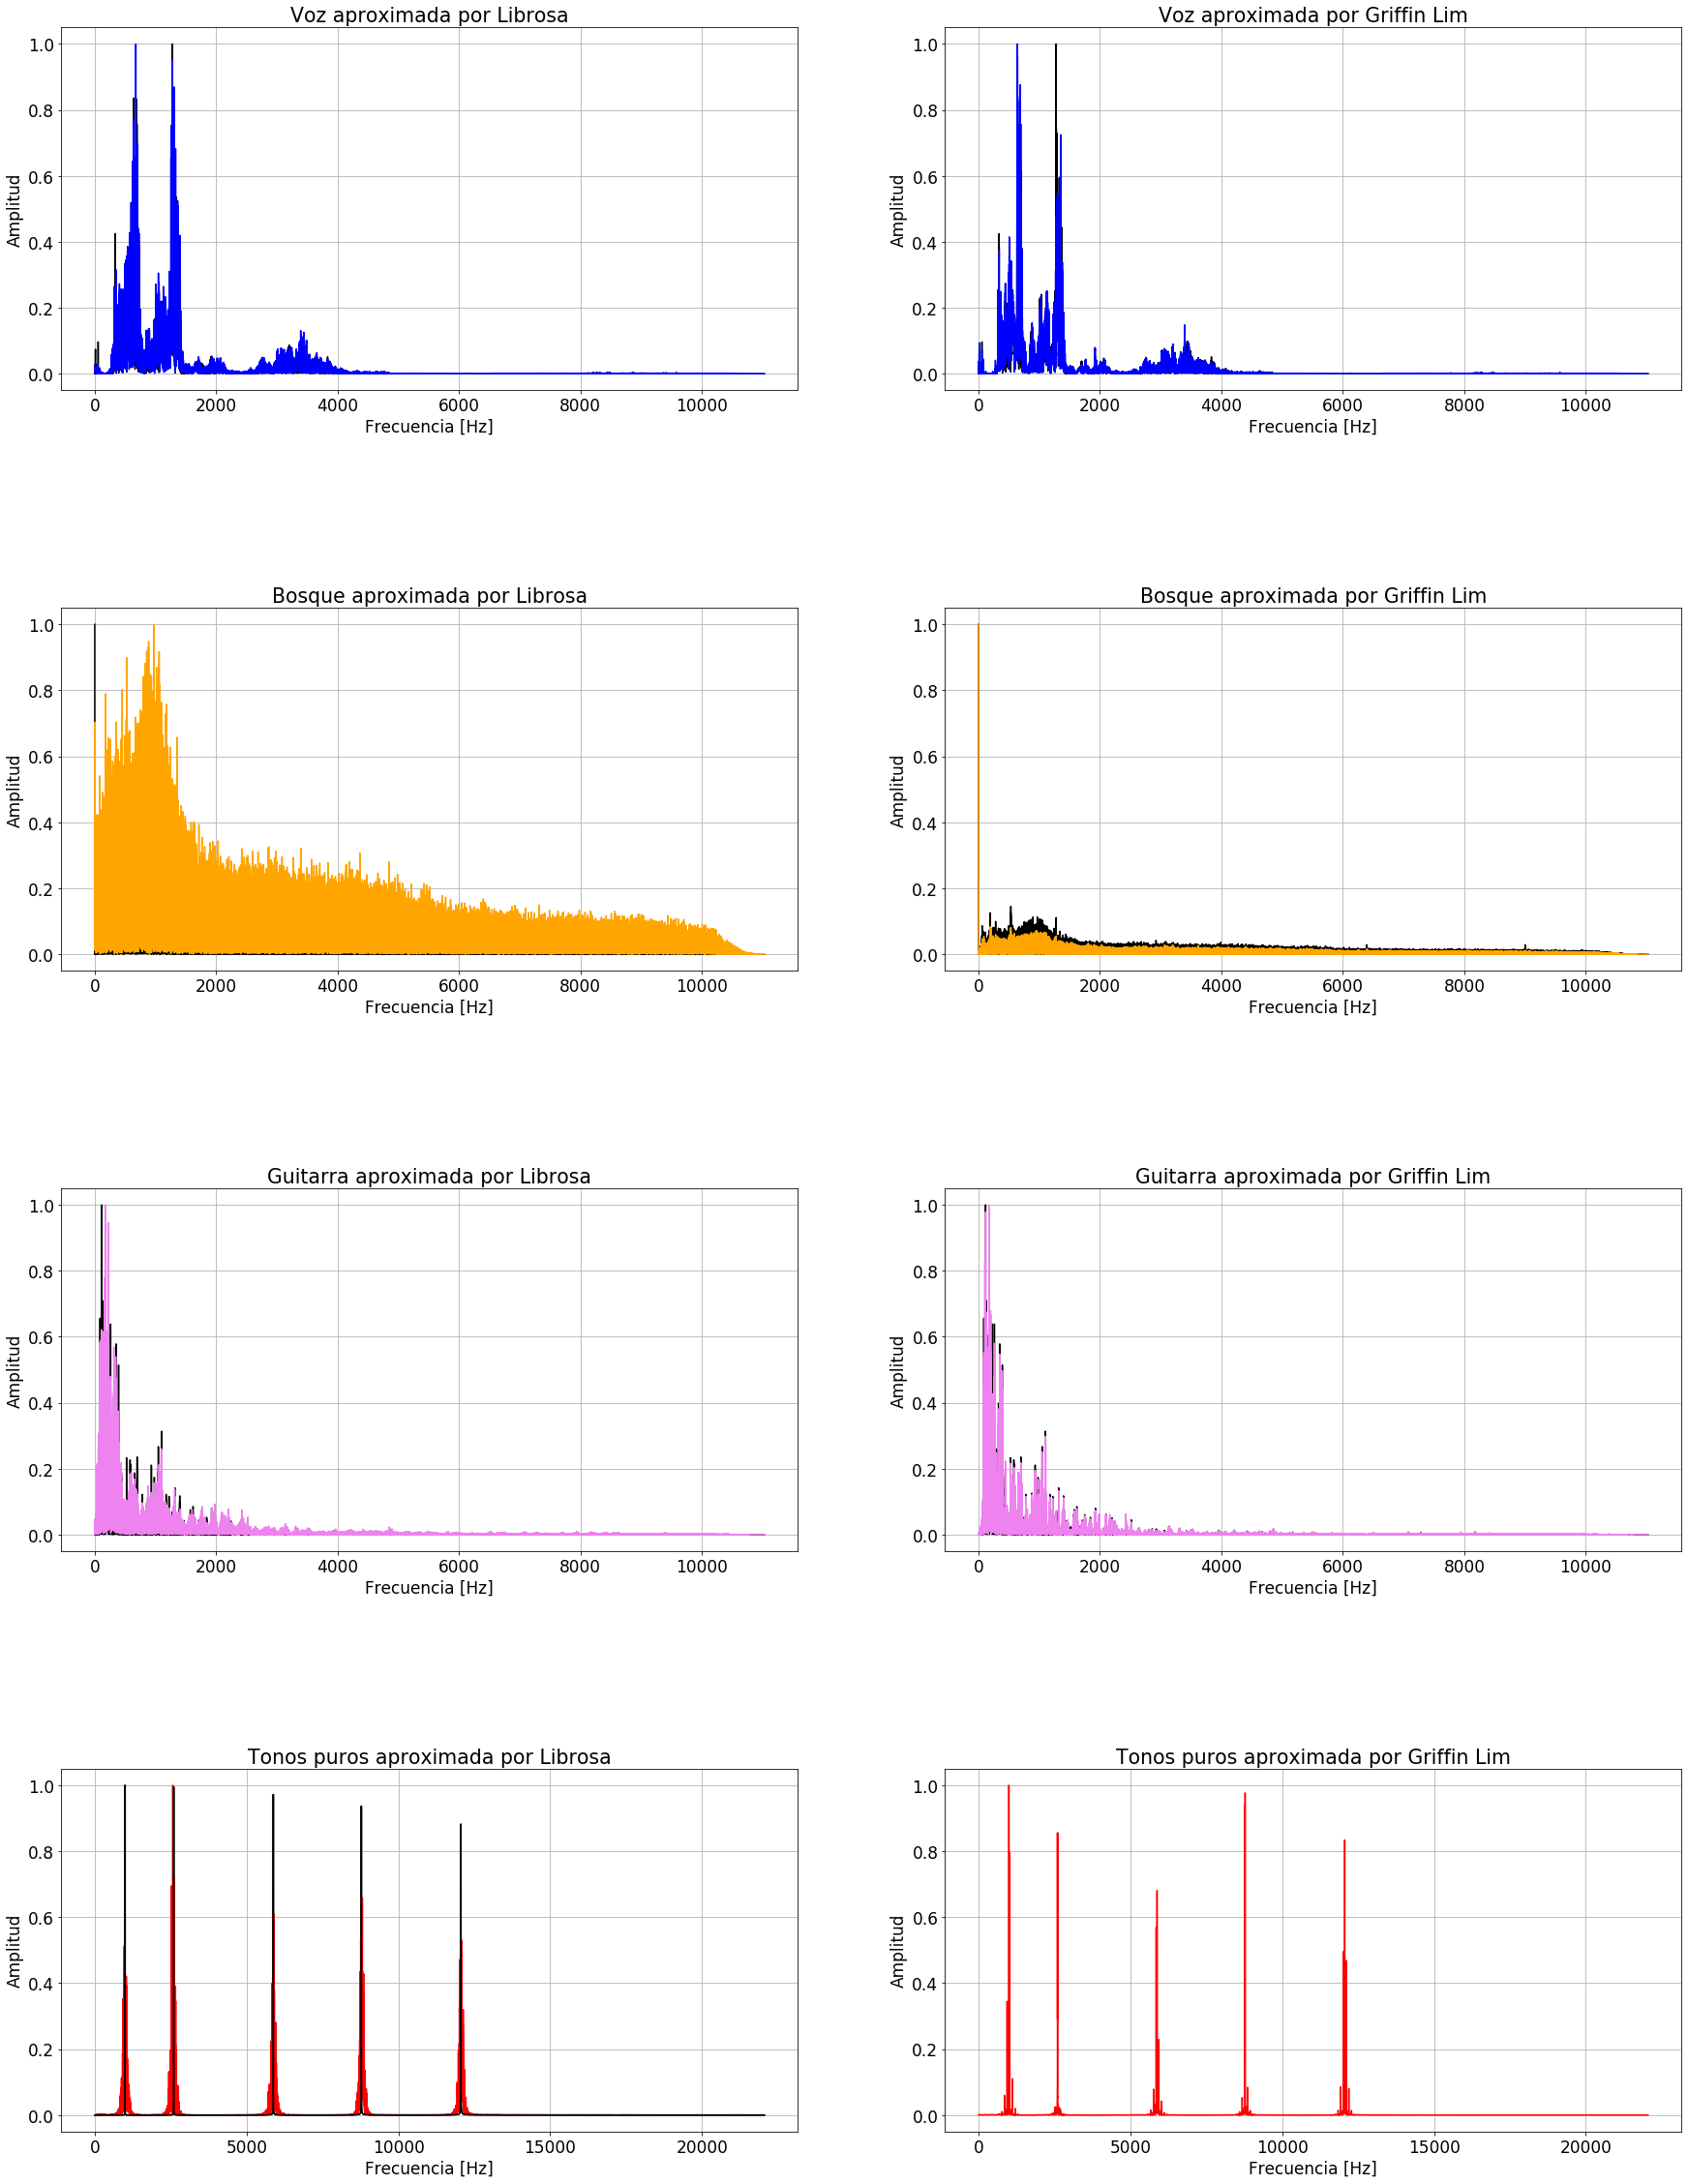

In [23]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(4, 2, sharex= False, sharey=False, figsize=[30, 40])
axs[0, 0].plot(freq_voice, fft_voice, color = 'black')
axs[0, 0].plot(freq_voice_librosa, fft_voice_librosa, color = 'blue')
axs[0, 0].set_title('Voz aproximada por Librosa')
axs[1, 0].plot(freq_bosque, fft_bosque, color='black')
axs[1, 0].plot(freq_bosque_librosa, fft_bosque_librosa, color='orange')
axs[1, 0].set_title('Bosque aproximada por Librosa')
axs[2, 0].plot(freq_guitarra, fft_guitarra ,color='black')
axs[2, 0].plot(freq_guitarra_librosa, fft_guitarra_librosa ,color='violet')
axs[2, 0].set_title('Guitarra aproximada por Librosa')
axs[3, 0].plot(freq_tonos, fft_tonos, color='black')
axs[3, 0].plot(freq_tonos_librosa, fft_tonos_librosa, color = 'red')
axs[3, 0].set_title('Tonos puros aproximada por Librosa')

axs[0, 1].plot(freq_voice, fft_voice, color = 'black')
axs[0, 1].plot(freq_voice_aprox, fft_voice_aprox, color= 'blue')
axs[0, 1].set_title('Voz aproximada por Griffin Lim')
axs[1, 1].plot(freq_bosque, fft_bosque, color='black')
axs[1, 1].plot(freq_bosque_aprox, fft_bosque_aprox, color='orange')
axs[1, 1].set_title('Bosque aproximada por Griffin Lim')
axs[2, 1].plot(freq_guitarra, fft_guitarra ,color='black')
axs[2, 1].plot(freq_guitarra_aprox, fft_guitarra_aprox ,color='violet')
axs[2, 1].set_title('Guitarra aproximada por Griffin Lim')
axs[3, 0].plot(freq_tonos, fft_tonos, color='black')
axs[3, 1].plot(freq_tonos_aprox, fft_tonos_aprox, color='red')
axs[3, 1].set_title('Tonos puros aproximada por Griffin Lim')

axs.flat[0].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[4].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[5].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[6].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[7].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')

plt.subplots_adjust( 
                    hspace=0.6)
for ax in axs.flat:
    ax.grid()


### Espectrogramas

In [24]:
ftonoslim, ttonoslim, y_voicelim = sgn.stft(tonos_aprox, fs, window = 'hann', nperseg = 1000)
ftonoslib, ttonoslib, y_voicelib = sgn.stft(tonos_librosa, fs, window = 'hann', nperseg = 1000)

Text(0, 0.5, 'Frecuencia [Hz]')

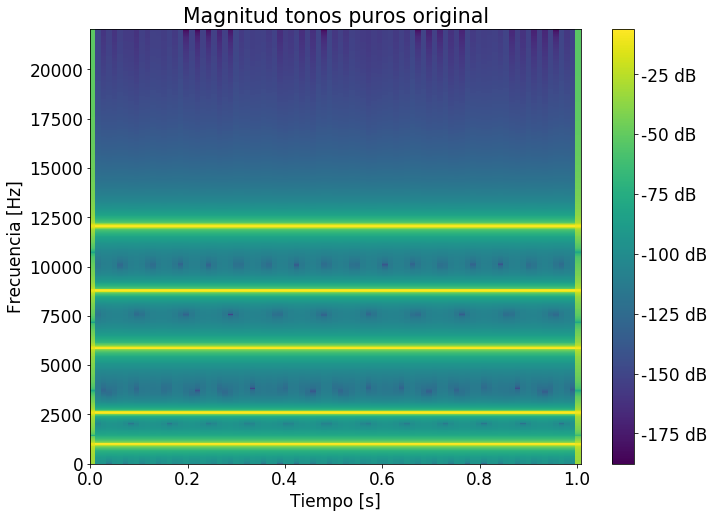

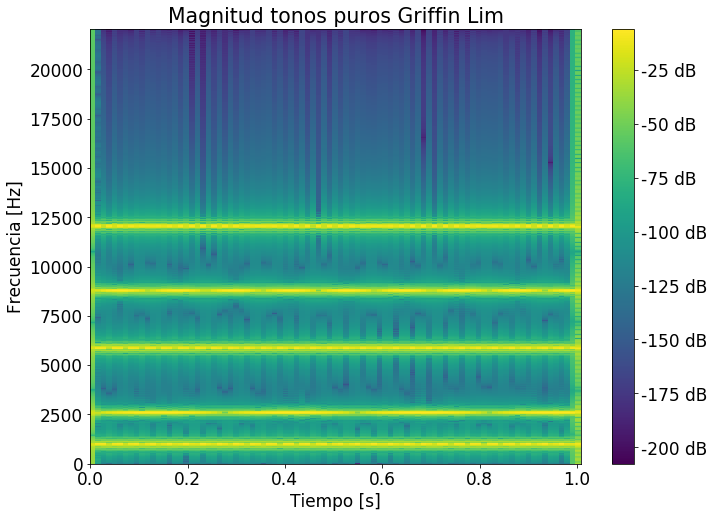

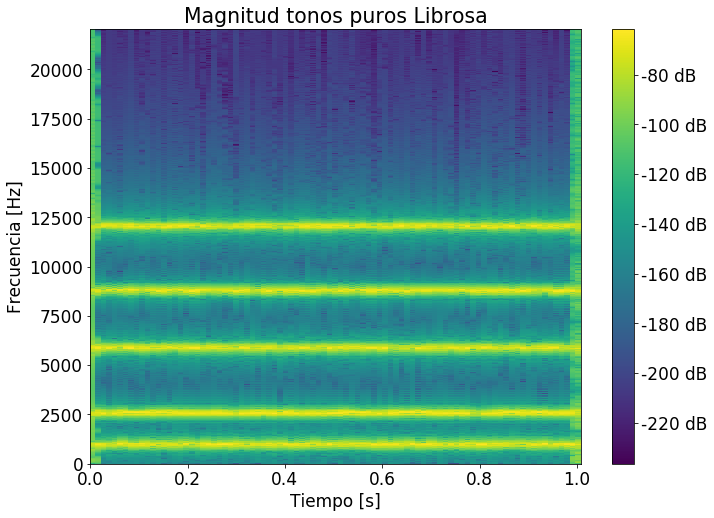

In [25]:


plt.figure(figsize=(11, 8))
xd2 = plt.pcolormesh(t4, f4,20*np.log10(abs(y_tonos)))
plt.colorbar(xd2, format='%+2.0f dB')
plt.title('Magnitud tonos puros original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

plt.figure(figsize=(11, 8))
xd3 =plt.pcolormesh(ttonoslim, ftonoslim, 20*np.log10(abs(y_voicelim)))
plt.colorbar(xd3, format='%+2.0f dB')
plt.title('Magnitud tonos puros Griffin Lim')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')


plt.figure(figsize=(11, 8))
xd4 =plt.pcolormesh(ttonoslib, ftonoslib, 20*np.log10(abs(y_voicelib)))
plt.colorbar(xd4, format='%+2.0f dB')
plt.title('Magnitud tonos puros Librosa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

Text(0, 0.5, 'Frecuencia [Hz]')

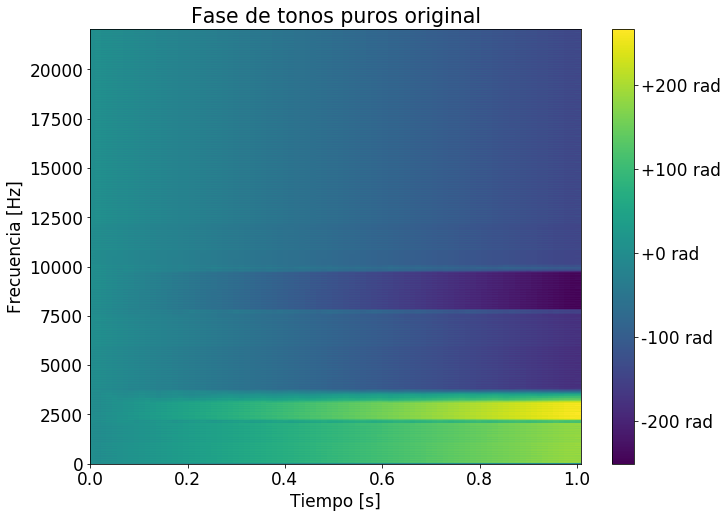

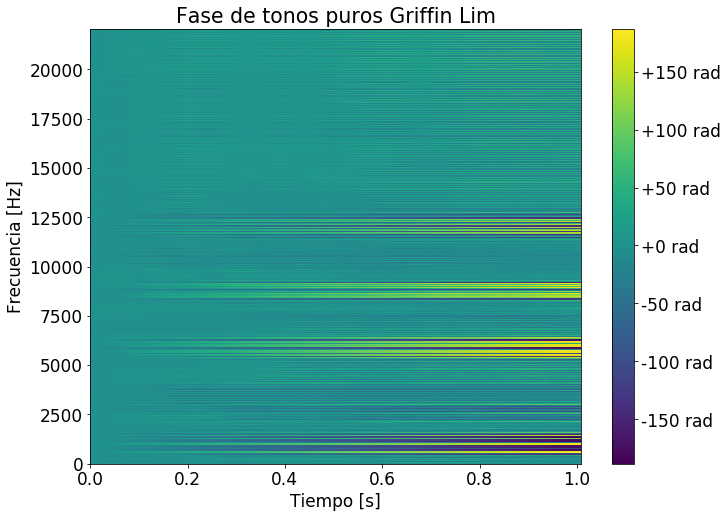

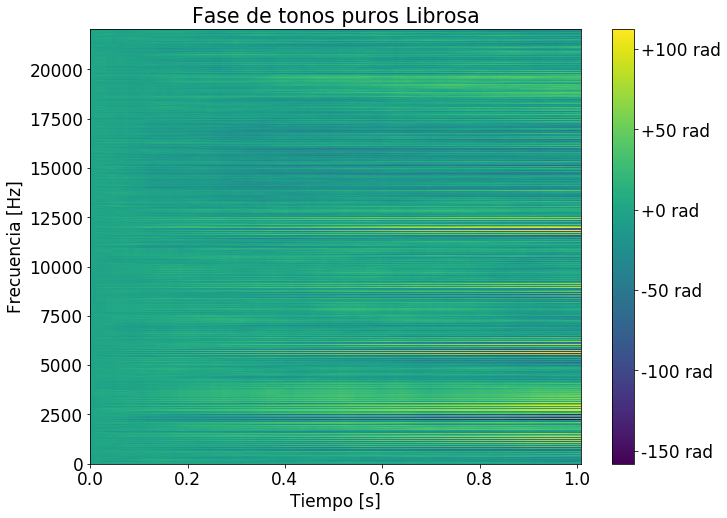

In [26]:
plt.figure(figsize=(11, 8))
xd5 = plt.pcolormesh(t4, f4, np.unwrap(np.angle(y_tonos)))
plt.colorbar(xd5, format='%+2.0f rad')
plt.title('Fase de tonos puros original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

plt.figure(figsize=(11, 8))
xd6 =plt.pcolormesh(ttonoslim, ftonoslim,  np.unwrap(np.angle(y_voicelim)))
plt.colorbar(xd6, format='%+2.0f rad')
plt.title('Fase de tonos puros Griffin Lim')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')


plt.figure(figsize=(11, 8))
xd7 =plt.pcolormesh(ttonoslib, ftonoslib, np.unwrap(np.angle(y_voicelib)))
plt.colorbar(xd7, format='%+2.0f rad')
plt.title('Fase de tonos puros Librosa')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')



## Reproduccion de Audios de guitarra

<h4>Audio original</h4>

In [28]:
ipd.Audio(0.5*guitarra,rate = fs3) # senial original

<h4>Audio Griffin Lim, algoritmo propio</h4>

In [29]:
ipd.Audio(0.5*guitarra_aprox,rate = fs3) # senial por algoritmo propio

<h4>Audio Griffin Lim, librosa</h4>

In [31]:
ipd.Audio(0.5*guitarra_librosa,rate = fs3) # senial por algoritmo de librosa